<a href="https://colab.research.google.com/github/Sreekodavanti/Big-Data/blob/main/spark_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you begin, you will need to create a new environment in Anaconda

``` conda env create -f environment.yml ```

You may also need to install Java and/or Scala.

In [ ]:
from pyspark.sql import SparkSession
import time


JDBC_URL = "jdbc:postgresql://localhost:5432/kafka_test"
JDBC_DRIVER = "org.postgresql.Driver"
JDBC_DRIVER_PATH = "./postgresql-42.6.0.jar"

spark = SparkSession.builder \
  .appName("spark_play") \
  .config("spark.jars", JDBC_DRIVER_PATH) \
  .config("spark.driver.extraClassPath", JDBC_DRIVER_PATH) \
  .config("spark.executor.memory", "1g") \
  .config("spark.executor.cores", "2") \
  .getOrCreate()




23/07/11 12:32:23 WARN Utils: Your hostname, Ryans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.193.10.21 instead (on interface en0)
23/07/11 12:32:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/07/11 12:32:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


+---+---------+
| id|   number|
+---+---------+
|  1|19.328894|
|  2| 16.14781|
|  3|13.593437|
|  4|13.982355|
|  5|13.188639|
+---+---------+
only showing top 5 rows



this script took  0.14183497428894043  seconds to run


/var/folders/xd/8_7vfh9950qfnn0bhl5l31gm0000gn/T/ipykernel_5180/525020244.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM numbers;", conn) # use whatever query you want here.


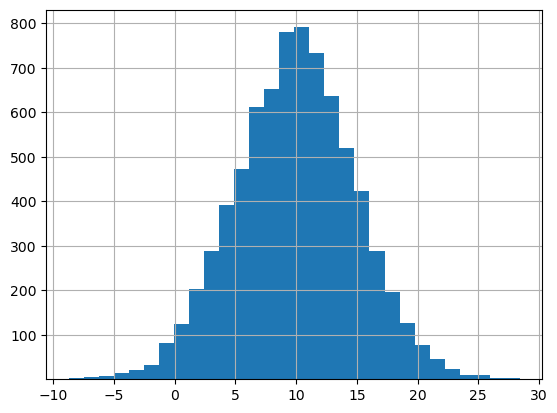

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import time

start = time.time()

conn = psycopg2.connect(database="kafka_test", user="postgres", password="password", host="localhost", port="5432")
df = pd.read_sql_query("SELECT * FROM numbers;", conn) # use whatever query you want here.

fig, ax = plt.subplots()
df['number'].hist(ax=ax, bins=30, bottom=0.1)

print ("this script took ", time.time() - start, " seconds to run")




In [ ]:
import time
startSpark = time.time()

df = spark.read.format("jdbc") \
  .option("url", JDBC_URL) \
  .option("driver", JDBC_DRIVER) \
  .option("dbtable", "numbers")\
  .option("user", "postgres") \
  .option("password", "password").load()

df.show(5)

print ("this script took ", time.time() - startSpark, " seconds to run")

+---+---------+
| id|   number|
+---+---------+
|  1|19.328894|
|  2| 16.14781|
|  3|13.593437|
|  4|13.982355|
|  5|13.188639|
+---+---------+
only showing top 5 rows

this script took  0.6246697902679443  seconds to run
